# NOTES FEATURE SCALING
Feature Scaling is the last thing that will done in Feature Engineering. It will done just before giving data to machine learning model.

It is technique to standerized the independent variable in dataset.  
Feature Scaling:---1)Standerization     2)Normalization
Geo-Metric Intuition Of Standerization ------ 1. Mean Centric    2)Scalling by the factor of Standard Deviation 
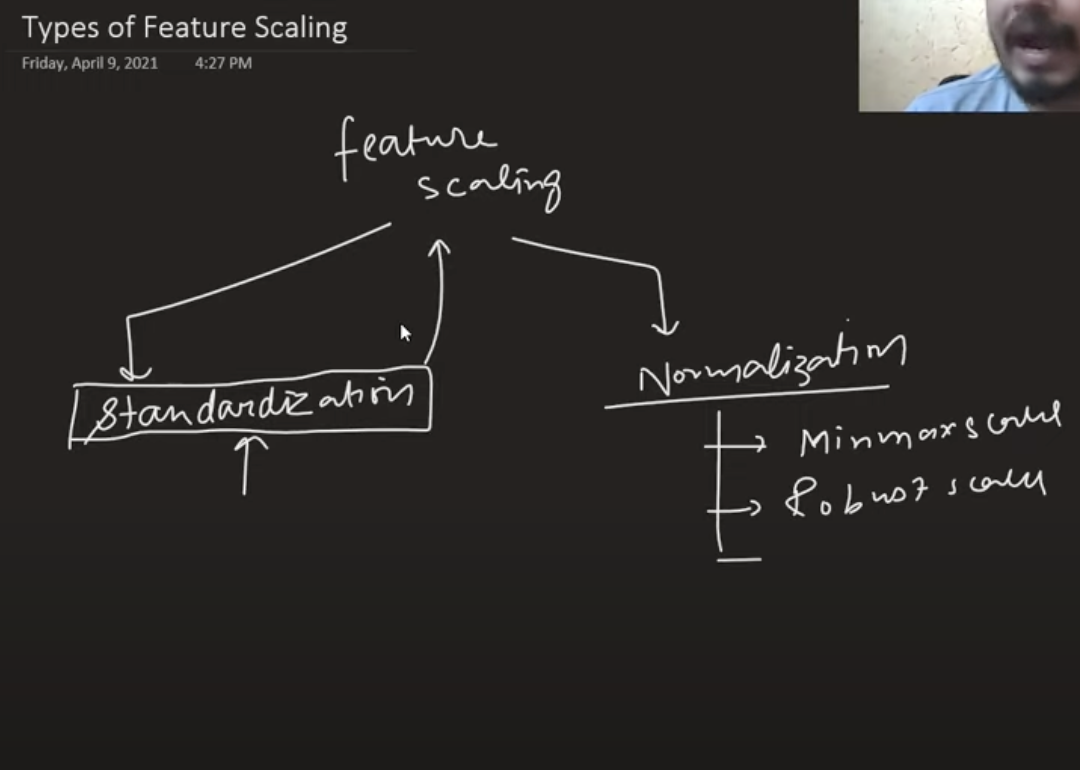
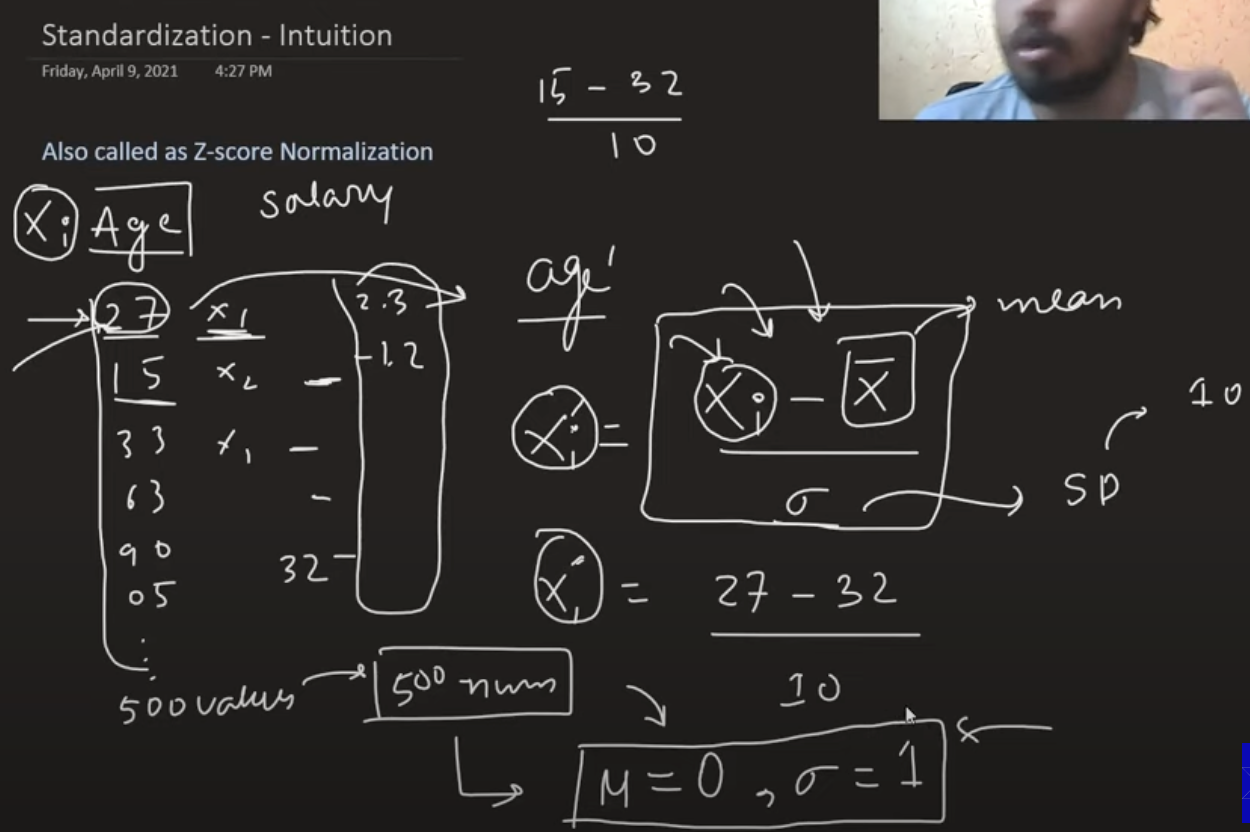

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
csv_path="/Users/mymunshi-rajneesh/Downloads/networkadds.csv"
df=pd.read_csv(csv_path)
df=df.iloc[:,2:]

In [151]:
df.sample(5)

,Age,EstimatedSalary,Purchased
323,48,30000,1
183,33,43000,0
244,41,72000,0
303,37,79000,1
120,36,75000,0


### Train Test Split

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),df[ 'Purchased'],test_size=0.3, random_state=0)

In [153]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
# fit the scaler to the train set, it will learn the parameters  Note:-It will learn only with train dataset and transform with boty train and test
scaler.fit(X_train)
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [154]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd. DataFrame (X_test_scaled, columns=X_test.columns)

In [155]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [156]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


### Effect Of Scaling

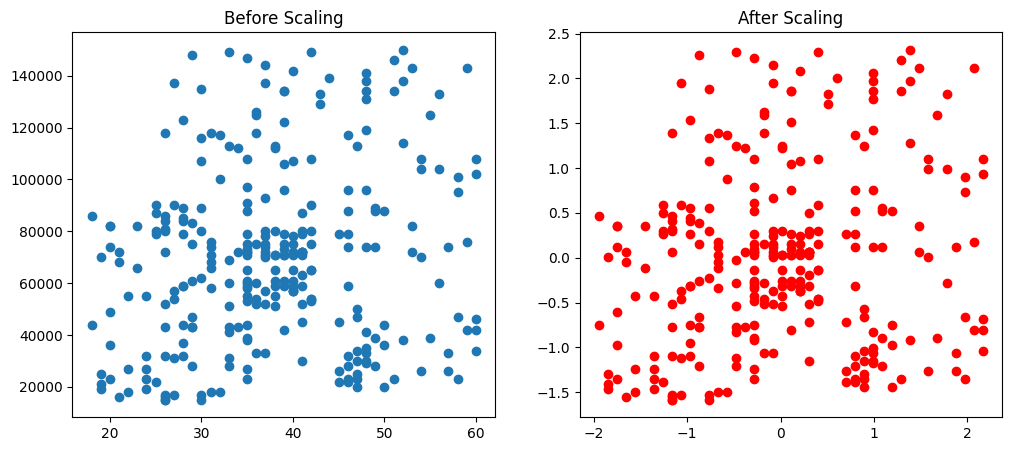

In [157]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter (X_train[ 'Age'], X_train[ 'EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter (X_train_scaled[ 'Age'], X_train_scaled[ 'EstimatedSalary'], color='red')
ax2.set_title("After Scaling")
plt.show()

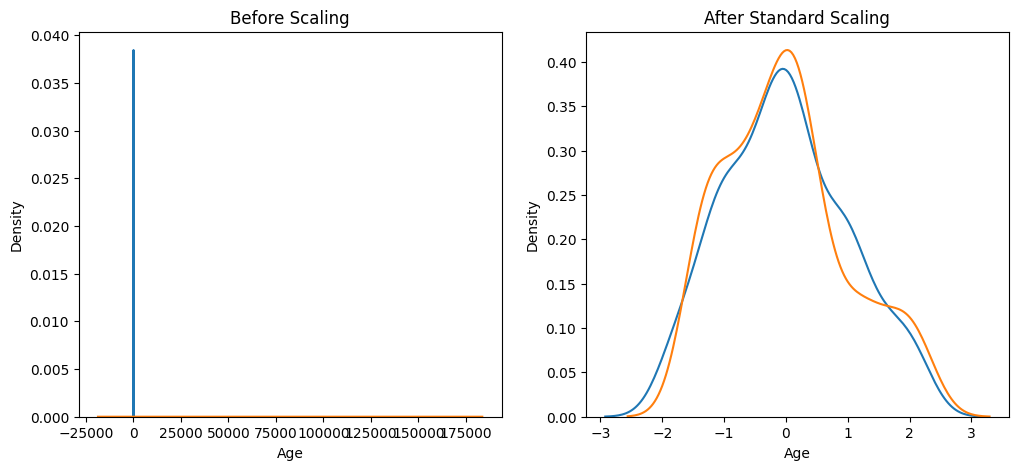

In [160]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# before scaling
ax1.set_title( 'Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled[ 'Age'], ax=ax2)
sns.kdeplot(X_train_scaled[ 'EstimatedSalary'], ax=ax2)
plt.show()

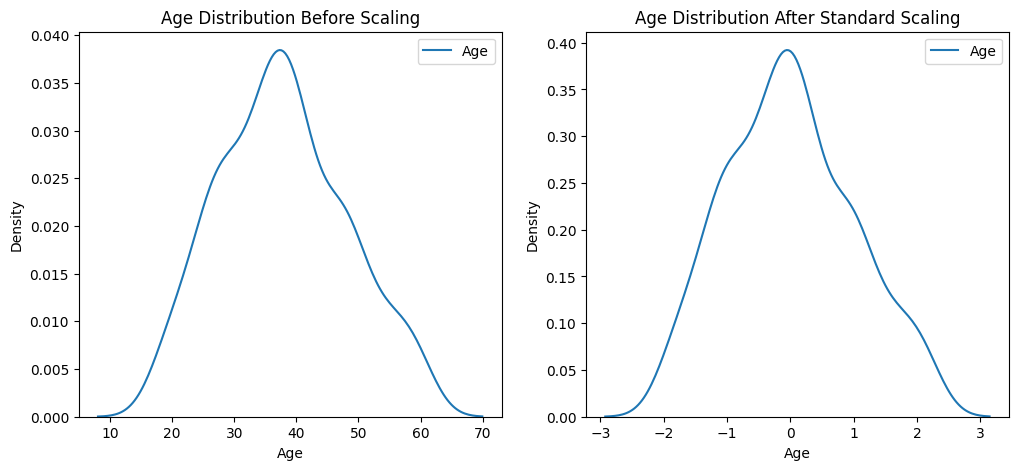

In [159]:
#Comparison of Distributions

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1,label='Age')
ax1.legend()
# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled[ 'Age'], ax=ax2,label='Age')
ax2.legend()
plt. show()

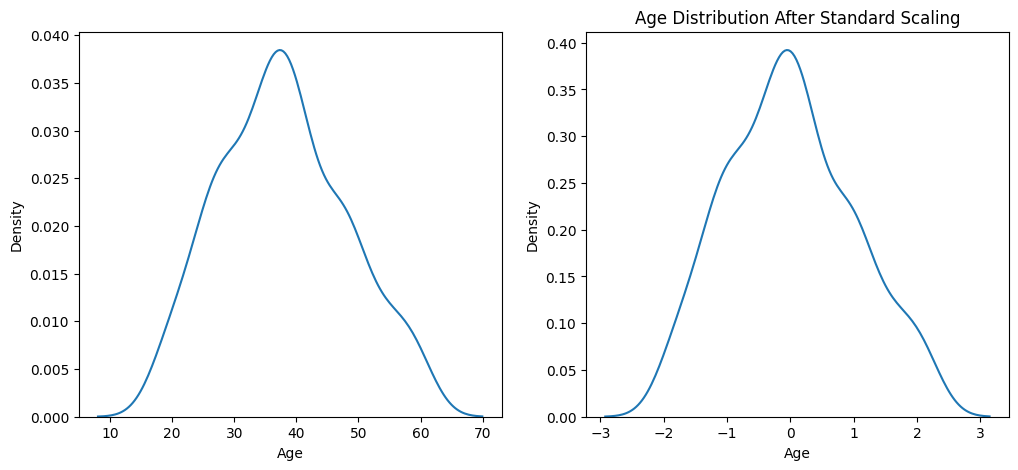

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# before scaling
axl.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
# after scaling
ax2.set_title('Age Distribution After Standard Scaling') 
sns.kdeplot(X_train_scaled[ 'Age'], ax=ax2)
plt. show()

## Normalization

##### Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information
###### MinMaxscaling
###### Mean normalization
###### Max absolute
###### Robust scoling

In [162]:
import numpy as np # Linear algebra 
import pandas as pd # data processing 
import matplotlib.pyplot as plt 
import seaborn as sns

In [163]:
csv_path="/Users/mymunshi-rajneesh/Downloads/wine_data.csv"

In [164]:
df = pd.read_csv( csv_path,header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

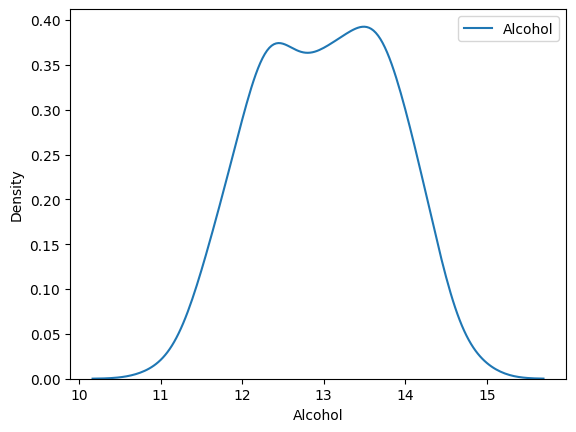

In [165]:
sns.kdeplot(df['Alcohol'],label="Alcohol")
plt.legend()

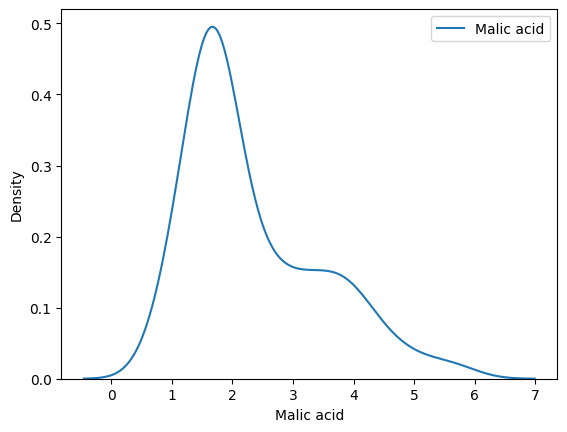

In [166]:
sns.kdeplot(df['Malic acid'],label="Malic acid")
plt.legend()

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

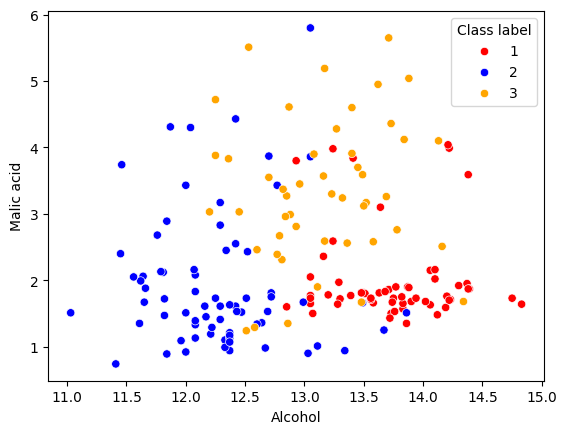

In [167]:
color_dict={1: 'red',3: 'orange' ,2: 'blue'}
sns.scatterplot(data=df,x='Alcohol', y='Malic acid', hue='Class label',palette=color_dict)

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df[ 'Class label'], 
                                                    test_size=0.3, 
                                                    random_state=0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [169]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [170]:
X_train_scaled = pd. DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [171]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [172]:
np.round(X_test.describe(),1)

,Alcohol,Malic acid
count,54.0,54.0
mean,13.0,2.2
std,0.8,1.1
min,11.4,0.7
25%,12.4,1.6
50%,13.0,1.8
75%,13.7,2.7
max,14.8,5.8


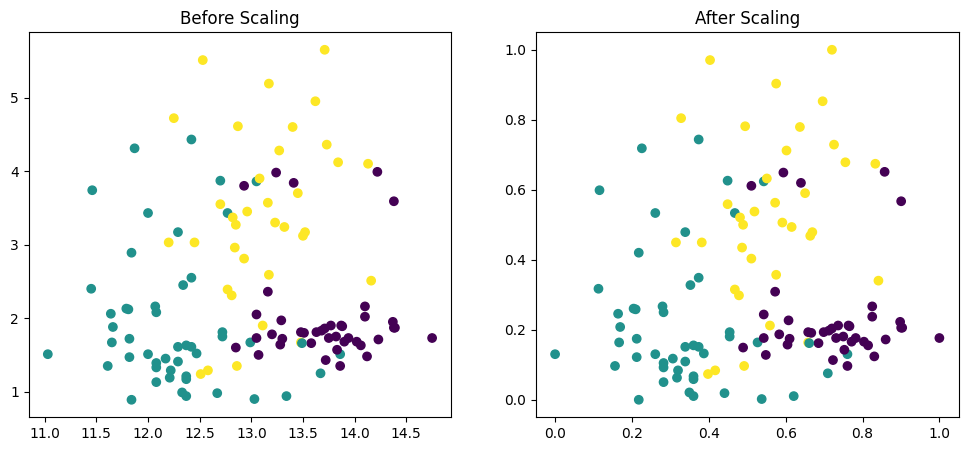

In [173]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(X_train['Alcohol'], X_train['Malic acid'] ,c=Y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled[ 'Malic acid'],c=Y_train)
ax2.set_title("After Scaling")
plt.show()

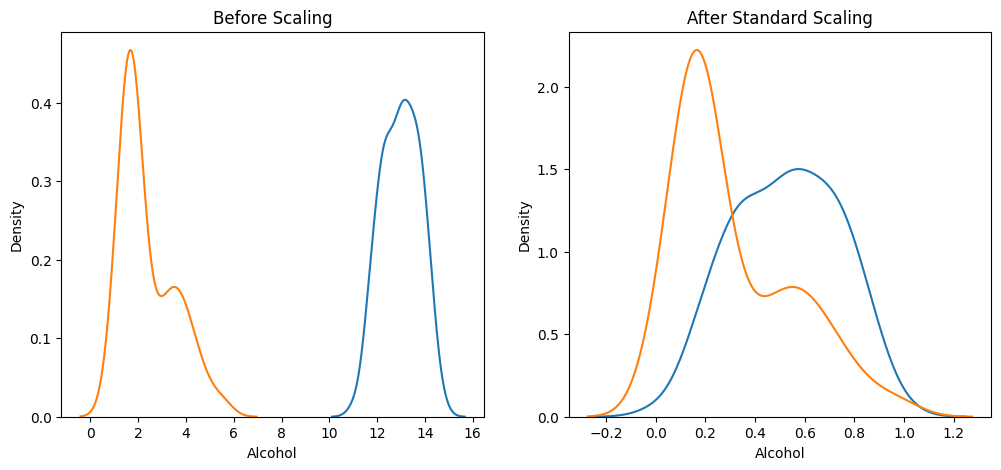

In [174]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# before scaling
ax1.set_title( 'Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)
# after scaling
ax2.set_title('After Standard Scaling') 
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled[ 'Malic acid'], ax=ax2)
plt.show()

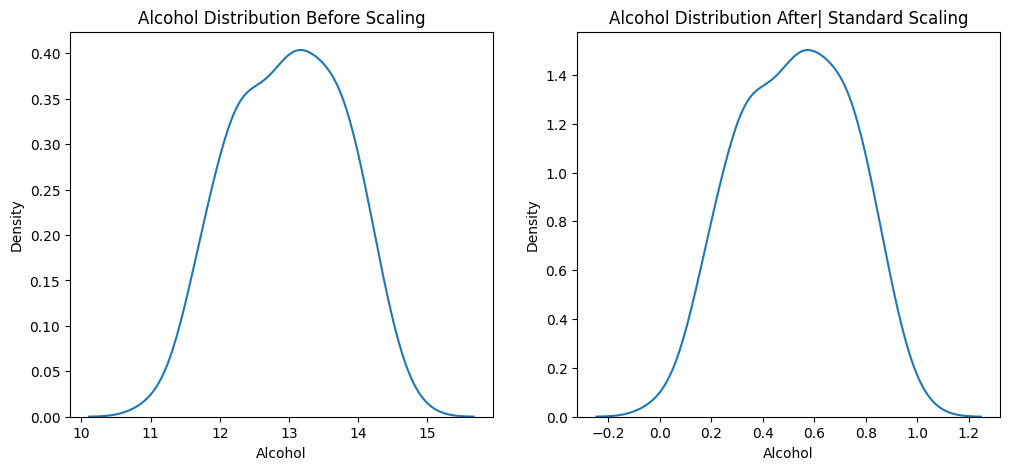

In [178]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot (X_train[ 'Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After| Standard Scaling')
sns.kdeplot(X_train_scaled[ 'Alcohol'], ax=ax2)
plt.show()

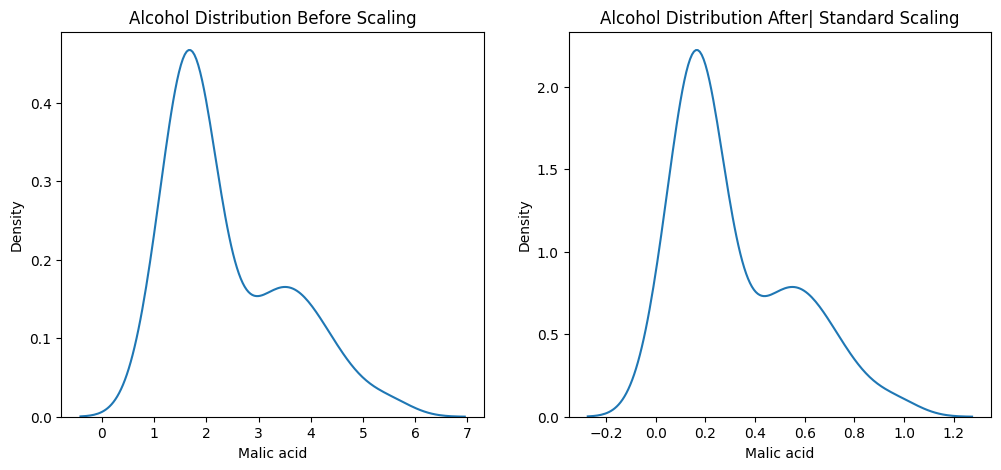

In [179]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot (X_train[ 'Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After| Standard Scaling')
sns.kdeplot(X_train_scaled[ 'Malic acid'], ax=ax2)
plt.show()